### Install Packages needed

In [1]:
pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import psycopg2
from sqlalchemy import create_engine, Column, Integer, String
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
import seaborn as sns

### Load dataset from the database & create DataFrame

In [7]:
# Database connection parameters
db_params = {
    'host': '194.171.191.226',
    'port': '6379',
    'dbname': 'postgres',
    'user': 'group18',
    'password': 'blockd_2024group18_44'
}

# Establish the connection
conn_psycopg2 = psycopg2.connect(
    host=db_params['host'],
    port=db_params['port'],
    dbname=db_params['dbname'],
    user=db_params['user'],
    password=db_params['password']
)

try:
    cursor = conn_psycopg2.cursor()
    # Select all columns from the table
    cursor.execute('SELECT * FROM data_lake.Precipitation')
    
    # Fetch all rows
    rows = cursor.fetchall()
    
    # Get column names
    colnames = [desc[0] for desc in cursor.description]
    
    # Create a pandas DataFrame
    df = pd.DataFrame(rows, columns=colnames)
    
    # Set display options
    pd.set_option('display.max_columns', None)  # Show all columns
    pd.set_option('display.width', 1000)        # Set the display width
    pd.set_option('display.max_colwidth', 30)   # Set max column width


    from IPython.display import display
    display(df)  # Display the first 5 rows
    
    conn_psycopg2.commit()  # Commit the transaction if all commands succeed
except Exception as e:
    conn_psycopg2.rollback()  # Rollback the transaction if any command fails
    print(f"An error occurred: {e}")
finally:
    cursor.close()
    conn_psycopg2.close()

,dtg,LOCATION,NAME,latitude,longitude,altitude,dr_pws_10,dr_regenm_10,ww_cor_10,ri_pws_10,ri_regenm_10
0,2004-12-18 06:30:00,350_R_a,Gilze-Rijen locatie 10t,51.565,4.935278,14.9,0.0,0.0,0.0,0.0,0.0
1,2004-12-18 06:40:00,350_R_a,Gilze-Rijen locatie 10t,51.565,4.935278,14.9,0.0,0.0,0.0,0.0,0.0
2,2004-12-18 06:50:00,350_R_a,Gilze-Rijen locatie 10t,51.565,4.935278,14.9,0.0,0.0,0.0,0.0,0.0
3,2004-12-18 07:00:00,350_R_a,Gilze-Rijen locatie 10t,51.565,4.935278,14.9,0.0,0.0,0.0,0.0,0.0
4,2004-12-18 07:10:00,350_R_a,Gilze-Rijen locatie 10t,51.565,4.935278,14.9,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1098427,2004-12-18 05:40:00,350_R_a,Gilze-Rijen locatie 10t,51.565,4.935278,14.9,0.0,0.0,0.0,0.0,0.0
1098428,2004-12-18 05:50:00,350_R_a,Gilze-Rijen locatie 10t,51.565,4.935278,14.9,0.0,0.0,0.0,0.0,0.0
1098429,2004-12-18 06:00:00,350_R_a,Gilze-Rijen locatie 10t,51.565,4.935278,14.9,0.0,0.0,0.0,0.0,0.0
1098430,2004-12-18 06:10:00,350_R_a,Gilze-Rijen locatie 10t,51.565,4.935278,14.9,0.0,0.0,0.0,0.0,0.0


### Remove unnecessary columns from the dataset

In [8]:
# Select only the required columns
columns_to_keep = ['dtg', 'LOCATION', 'dr_regenm_10', 'ri_regenm_10']
df_1 = df[columns_to_keep]
    
# Set display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Set the display width
pd.set_option('display.max_colwidth', 30)   # Set max column width
    
display(df_1.head())  # Display the first 5 rows

,dtg,LOCATION,dr_regenm_10,ri_regenm_10
0,2004-12-18 06:30:00,350_R_a,0.0,0.0
1,2004-12-18 06:40:00,350_R_a,0.0,0.0
2,2004-12-18 06:50:00,350_R_a,0.0,0.0
3,2004-12-18 07:00:00,350_R_a,0.0,0.0
4,2004-12-18 07:10:00,350_R_a,0.0,0.0


### Split dtg column into date & time

In [9]:
# Create 'date' and 'time' columns
df_1['date'] = df_1['dtg'].dt.date
df_1['time'] = df_1['dtg'].dt.time
    
# Drop the original 'dtg' column
df_1.drop(columns=['dtg'], inplace=True)

df_1

/tmp/ipykernel_19899/467967243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['date'] = df_1['dtg'].dt.date
/tmp/ipykernel_19899/467967243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['time'] = df_1['dtg'].dt.time
/tmp/ipykernel_19899/467967243.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.d

,LOCATION,dr_regenm_10,ri_regenm_10,date,time
0,350_R_a,0.0,0.0,2004-12-18,06:30:00
1,350_R_a,0.0,0.0,2004-12-18,06:40:00
2,350_R_a,0.0,0.0,2004-12-18,06:50:00
3,350_R_a,0.0,0.0,2004-12-18,07:00:00
4,350_R_a,0.0,0.0,2004-12-18,07:10:00
...,...,...,...,...,...
1098427,350_R_a,0.0,0.0,2004-12-18,05:40:00
1098428,350_R_a,0.0,0.0,2004-12-18,05:50:00
1098429,350_R_a,0.0,0.0,2004-12-18,06:00:00
1098430,350_R_a,0.0,0.0,2004-12-18,06:10:00


### Filter dates between 01-01-2018 and 29-02-2024

In [10]:
# Convert 'date' column to datetime type
df_1['date'] = pd.to_datetime(df_1['date'])


start_date = '2018-01-01'
end_date = '2024-2-29'
df_1 = df_1[(df_1['date'] >= start_date) & (df_1['date'] <= end_date)]

# Print the filtered dataframe
print(df_1)

/tmp/ipykernel_19899/473945757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['date'] = pd.to_datetime(df_1['date'])


        LOCATION  dr_regenm_10  ri_regenm_10       date      time
684249   350_R_a           0.0           0.0 2018-01-01  00:00:00
684250   350_R_a           0.0           0.0 2018-01-01  00:10:00
684251   350_R_a           0.0           0.0 2018-01-01  00:20:00
684252   350_R_a           0.0           0.0 2018-01-01  00:30:00
684253   350_R_a           0.0           0.0 2018-01-01  00:40:00
...          ...           ...           ...        ...       ...
1003924  350_R_a           0.0           0.0 2024-02-29  23:10:00
1003925  350_R_a           0.0           0.0 2024-02-29  23:20:00
1003926  350_R_a           0.0           0.0 2024-02-29  23:30:00
1003927  350_R_a           0.0           0.0 2024-02-29  23:40:00
1003928  350_R_a           0.0           0.0 2024-02-29  23:50:00

[319680 rows x 5 columns]


### Handling missing values by: 
- Removing Missing Values
- Filling Missing values: fill missing values with a specific values, such as 
the mean, median, mode, or a fixed value
- Interpolation: use interpolation methods to estimate and fill missing 
values
- Flagging Missing value: Create an additional column to indicate the 
presence of missing values

In [11]:
# Check for missing values
for column in df_1.columns:
    missing_values = df_1[column].isnull().sum()
    print(f"Column '{column}': {missing_values} missing values")

Column 'LOCATION': 0 missing values
Column 'dr_regenm_10': 194 missing values
Column 'ri_regenm_10': 5828 missing values
Column 'date': 0 missing values
Column 'time': 0 missing values


In [12]:
#Removing Missing Values
df_1.dropna()

,LOCATION,dr_regenm_10,ri_regenm_10,date,time
684249,350_R_a,0.0,0.0,2018-01-01,00:00:00
684250,350_R_a,0.0,0.0,2018-01-01,00:10:00
684251,350_R_a,0.0,0.0,2018-01-01,00:20:00
684252,350_R_a,0.0,0.0,2018-01-01,00:30:00
684253,350_R_a,0.0,0.0,2018-01-01,00:40:00
...,...,...,...,...,...
1003924,350_R_a,0.0,0.0,2024-02-29,23:10:00
1003925,350_R_a,0.0,0.0,2024-02-29,23:20:00
1003926,350_R_a,0.0,0.0,2024-02-29,23:30:00
1003927,350_R_a,0.0,0.0,2024-02-29,23:40:00


In [13]:
# Filling Missing Values
df_1_mean = df_1.fillna(df_1.mean(numeric_only=True))  # Fill missing values with the mean
df_1_median = df_1.fillna(df_1.median(numeric_only=True))  # Fill missing values with the median
df_1_mode = df_1.fillna(df_1.mode().iloc[0])  # Fill missing values with the mode
df_1_fixed = df_1.fillna(0)  # Fill missing values with a fixed value (e.g., 0)

print("\nDataFrame after Filling Missing Values with Mean:")
print(df_1_mean.head())


DataFrame after Filling Missing Values with Mean:
       LOCATION  dr_regenm_10  ri_regenm_10       date      time
684249  350_R_a           0.0           0.0 2018-01-01  00:00:00
684250  350_R_a           0.0           0.0 2018-01-01  00:10:00
684251  350_R_a           0.0           0.0 2018-01-01  00:20:00
684252  350_R_a           0.0           0.0 2018-01-01  00:30:00
684253  350_R_a           0.0           0.0 2018-01-01  00:40:00


In [14]:
# Interpolation
df_interpolated = df_1.infer_objects(copy=False).interpolate()  # Convert object columns and interpolate missing values
df_interpolated

/tmp/ipykernel_19899/3348428278.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df_1.infer_objects(copy=False).interpolate()  # Convert object columns and interpolate missing values


,LOCATION,dr_regenm_10,ri_regenm_10,date,time
684249,350_R_a,0.0,0.0,2018-01-01,00:00:00
684250,350_R_a,0.0,0.0,2018-01-01,00:10:00
684251,350_R_a,0.0,0.0,2018-01-01,00:20:00
684252,350_R_a,0.0,0.0,2018-01-01,00:30:00
684253,350_R_a,0.0,0.0,2018-01-01,00:40:00
...,...,...,...,...,...
1003924,350_R_a,0.0,0.0,2024-02-29,23:10:00
1003925,350_R_a,0.0,0.0,2024-02-29,23:20:00
1003926,350_R_a,0.0,0.0,2024-02-29,23:30:00
1003927,350_R_a,0.0,0.0,2024-02-29,23:40:00


In [15]:
# Fill missing values in 'dr_regenm_10' with the column mean
df_1['dr_regenm_10'].fillna(df_1['dr_regenm_10'].mean(), inplace=True)

# Fill missing values in 'ri_regenm_10' with the column mean
df_1['ri_regenm_10'].fillna(df_1['ri_regenm_10'].mean(), inplace=True)

# Check the result
for column in df_1.columns:
    missing_values = df_1[column].isnull().sum()
    print(f"Column '{column}': {missing_values} missing values")

Column 'LOCATION': 0 missing values
Column 'dr_regenm_10': 0 missing values
Column 'ri_regenm_10': 0 missing values
Column 'date': 0 missing values
Column 'time': 0 missing values


/tmp/ipykernel_19899/2726259739.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1['dr_regenm_10'].fillna(df_1['dr_regenm_10'].mean(), inplace=True)
/tmp/ipykernel_19899/2726259739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['dr_regenm_10'].fillna(df_1['dr_regenm_10'].mean(), inplace=True)
/tmp/ipykernel_19899/2726259739.py:

###  Handling outliers

In [16]:
from scipy import stats

# Compute Z-scores for the 'dr_regenm_10' column
z_scores = np.abs(stats.zscore(df_1['dr_regenm_10']))

# Identify outliers
threshold = 3
outliers = df_1[np.abs(z_scores) > threshold]

print("Number of outliers detected:", len(outliers))
print("Outliers:", outliers)

Number of outliers detected: 21003
Outliers:         LOCATION  dr_regenm_10  ri_regenm_10       date      time
684258   350_R_a         600.0         2.220 2018-01-01  01:30:00
684259   350_R_a         600.0         4.830 2018-01-01  01:40:00
684260   350_R_a         600.0         1.610 2018-01-01  01:50:00
684261   350_R_a         600.0         0.917 2018-01-01  02:00:00
684262   350_R_a         600.0         0.696 2018-01-01  02:10:00
...          ...           ...           ...        ...       ...
1003908  350_R_a         600.0         0.924 2024-02-29  20:30:00
1003909  350_R_a         600.0         1.260 2024-02-29  20:40:00
1003910  350_R_a         600.0         0.294 2024-02-29  20:50:00
1003913  350_R_a         600.0         0.864 2024-02-29  21:20:00
1003914  350_R_a         600.0         0.659 2024-02-29  21:30:00

[21003 rows x 5 columns]


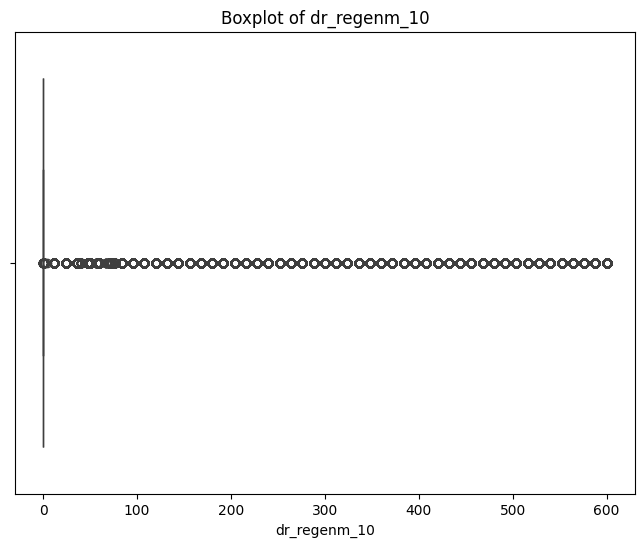

In [17]:
# Create a boxplot of the 'dr_regenm_10' column
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_1, x='dr_regenm_10')
plt.title('Boxplot of dr_regenm_10')
plt.show()

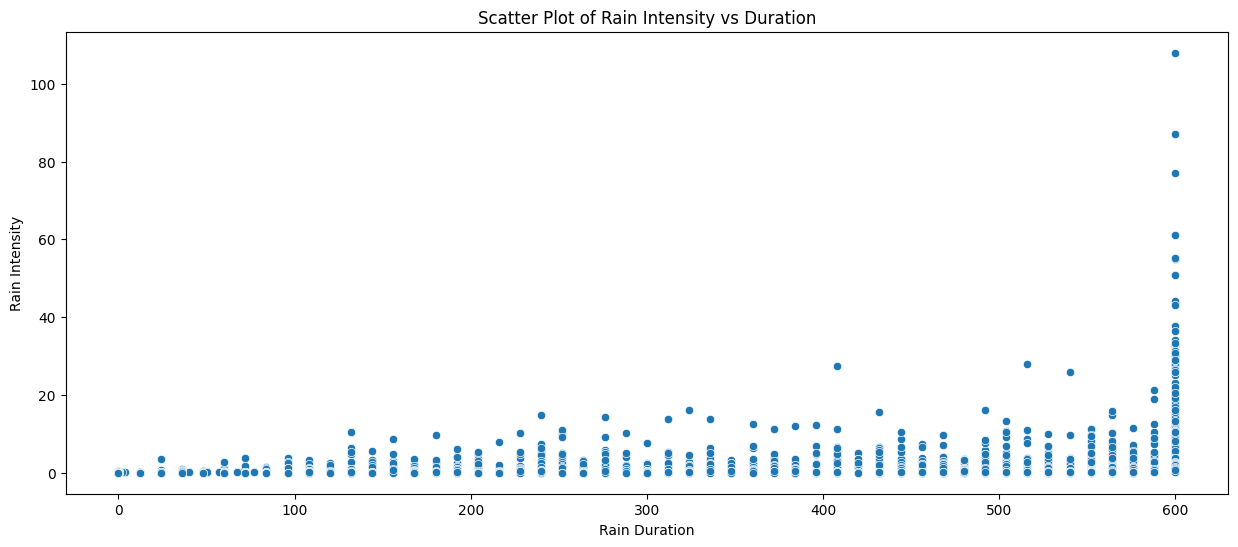

In [18]:
# Identify Outliers
# Visualize using scatter plot
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df_1, x='dr_regenm_10', y='ri_regenm_10')
plt.title('Scatter Plot of Rain Intensity vs Duration')
plt.xlabel('Rain Duration')
plt.ylabel('Rain Intensity')
plt.show()

In [19]:
# Compute Z-scores for the 'ri_regenm_10' column
z_scores_intensity = np.abs(stats.zscore(df_1['ri_regenm_10']))

# Identify outliers
threshold = 3
outliers_intensity = df_1[np.abs(z_scores_intensity) > threshold]

print("Number of outliers in rain intensity column detected:", len(outliers_intensity))
print("Outliers in rain intensity column:", outliers_intensity)


Number of outliers in rain intensity column detected: 3054
Outliers in rain intensity column:         LOCATION  dr_regenm_10  ri_regenm_10       date      time
684259   350_R_a         600.0          4.83 2018-01-01  01:40:00
684344   350_R_a         600.0          2.25 2018-01-01  15:50:00
684542   350_R_a         600.0          2.90 2018-01-03  00:50:00
684546   350_R_a         600.0          3.51 2018-01-03  01:30:00
684547   350_R_a         600.0          2.96 2018-01-03  01:40:00
...          ...           ...           ...        ...       ...
1002911  350_R_a         600.0          2.53 2024-02-22  22:20:00
1002914  350_R_a         600.0          2.80 2024-02-22  22:50:00
1003044  350_R_a         600.0          2.59 2024-02-23  20:30:00
1003376  350_R_a         600.0          2.49 2024-02-26  03:50:00
1003429  350_R_a         600.0          2.26 2024-02-26  12:40:00

[3054 rows x 5 columns]


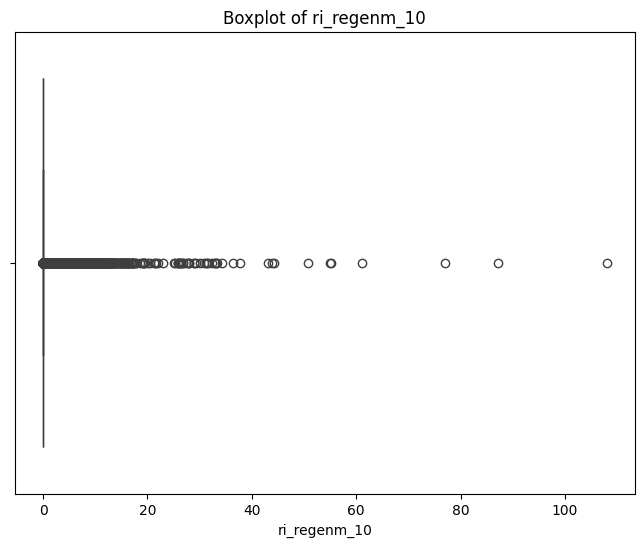

In [20]:
# Create a boxplot of the 'ri_regenm_10' column
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_1, x='ri_regenm_10')
plt.title('Boxplot of ri_regenm_10')
plt.show()

In [21]:
# Transforming Data
# Log Transformation
df_log_transformed = df_1.copy()
df_log_transformed['dr_regenm_10'] = np.log1p(df_log_transformed['dr_regenm_10'])
df_log_transformed['ri_regenm_10'] = np.log1p(df_log_transformed['ri_regenm_10'])
print("DataFrame after Log Transformation:")
print(df_log_transformed.head())

# Square Root Transformation
df_sqrt_transformed = df_1.copy()
df_sqrt_transformed['dr_regenm_10'] = np.sqrt(df_sqrt_transformed['dr_regenm_10'])
df_sqrt_transformed['ri_regenm_10'] = np.sqrt(df_sqrt_transformed['ri_regenm_10'])
print("DataFrame after Square Root Transformation:")
print(df_sqrt_transformed.head())

DataFrame after Log Transformation:
       LOCATION  dr_regenm_10  ri_regenm_10       date      time
684249  350_R_a           0.0           0.0 2018-01-01  00:00:00
684250  350_R_a           0.0           0.0 2018-01-01  00:10:00
684251  350_R_a           0.0           0.0 2018-01-01  00:20:00
684252  350_R_a           0.0           0.0 2018-01-01  00:30:00
684253  350_R_a           0.0           0.0 2018-01-01  00:40:00
DataFrame after Square Root Transformation:
       LOCATION  dr_regenm_10  ri_regenm_10       date      time
684249  350_R_a           0.0           0.0 2018-01-01  00:00:00
684250  350_R_a           0.0           0.0 2018-01-01  00:10:00
684251  350_R_a           0.0           0.0 2018-01-01  00:20:00
684252  350_R_a           0.0           0.0 2018-01-01  00:30:00
684253  350_R_a           0.0           0.0 2018-01-01  00:40:00


### Create a risk level feature

Low risk: < 0.4 mm/10min 

Mid risk: 0.4 to 1.25 mm/10min

High risk: > 1.25 mm/10min

In [22]:
# Define the function to determine risk level based on rainfall intensity and duration
def determine_risk(intensity, duration):
    rainfall_intensity = intensity * (duration / 600)  # Convert duration to 10 minutes (600 seconds)
    if rainfall_intensity < 0.4:
        return 'Low'
    elif 0.4 <= rainfall_intensity <= 1.25:
        return 'Mid'
    else:
        return 'High'

# Apply the function to determine the risk level
df_1['risk_level'] = df_1.apply(lambda row: determine_risk(row['dr_regenm_10'], row['ri_regenm_10']), axis=1)

# Print the DataFrame with the new column
print(df_1)

        LOCATION  dr_regenm_10  ri_regenm_10       date      time risk_level
684249   350_R_a           0.0           0.0 2018-01-01  00:00:00        Low
684250   350_R_a           0.0           0.0 2018-01-01  00:10:00        Low
684251   350_R_a           0.0           0.0 2018-01-01  00:20:00        Low
684252   350_R_a           0.0           0.0 2018-01-01  00:30:00        Low
684253   350_R_a           0.0           0.0 2018-01-01  00:40:00        Low
...          ...           ...           ...        ...       ...        ...
1003924  350_R_a           0.0           0.0 2024-02-29  23:10:00        Low
1003925  350_R_a           0.0           0.0 2024-02-29  23:20:00        Low
1003926  350_R_a           0.0           0.0 2024-02-29  23:30:00        Low
1003927  350_R_a           0.0           0.0 2024-02-29  23:40:00        Low
1003928  350_R_a           0.0           0.0 2024-02-29  23:50:00        Low

[319680 rows x 6 columns]


/tmp/ipykernel_19899/2327651555.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['risk_level'] = df_1.apply(lambda row: determine_risk(row['dr_regenm_10'], row['ri_regenm_10']), axis=1)


/tmp/ipykernel_19899/264530064.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='risk_level', data=df_1, palette='viridis')


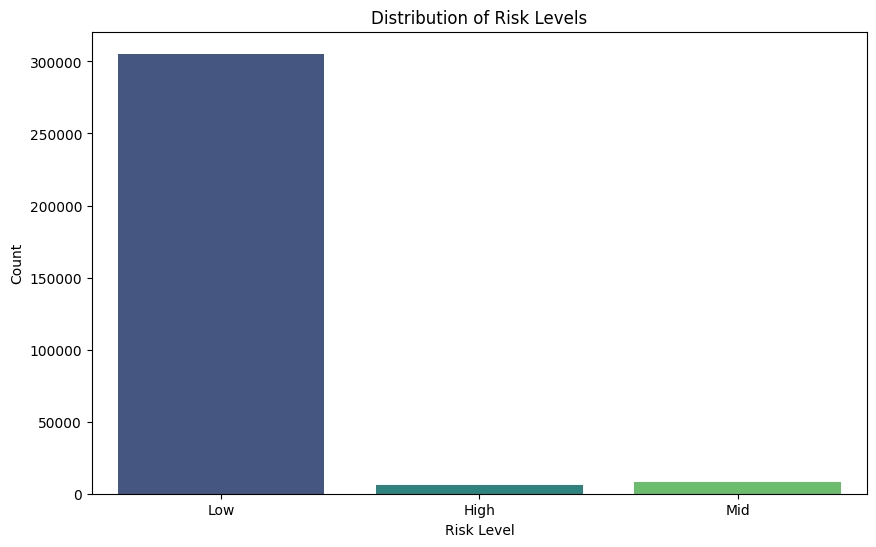

In [23]:
# Count plot for risk levels
plt.figure(figsize=(10, 6))
sns.countplot(x='risk_level', data=df_1, palette='viridis')

# Add title and labels
plt.title('Distribution of Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Count')

# Show plot
plt.show()

In [24]:
# Convert date column to datetime
df_1['date'] = pd.to_datetime(df_1['date'])

# Group by LOCATION and date and calculate the mean of rain intensity
df1 = df_1.groupby(['LOCATION', 'date'])['ri_regenm_10'].mean().reset_index()

# Rename the column for clarity
df1.rename(columns={'ri_regenm_10': 'rain'}, inplace=True)

/tmp/ipykernel_19899/2464289003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['date'] = pd.to_datetime(df_1['date'])


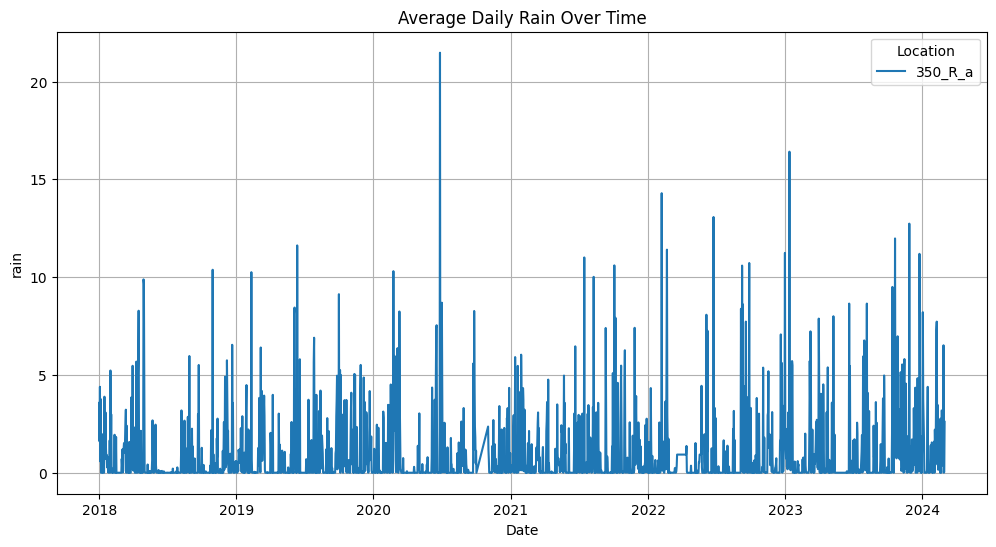

In [31]:
import matplotlib.pyplot as plt

# Assuming result DataFrame is already defined with columns 'LOCATION', 'date', and 'average_daily_intensity'

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Plotting each location's data separately
for location in df1['LOCATION'].unique():
    location_data = df1[df1['LOCATION'] == location]
    plt.plot(location_data['date'], location_data['rain'], label=location)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('rain')
plt.title('Average Daily Rain Over Time')
plt.legend(title='Location')
plt.grid(True)

# Display the plot
plt.show()

In [32]:
# Define the function to determine risk level based on daily rainfall intensity
def determine_risk(intensity):
    if intensity < 4:
        return 'Low'
    elif 4 <= intensity < 8:
        return 'Mid'
    else:
        return 'High'

# Apply the function to determine the risk level
df1['risk_level'] = df1['rain'].apply(determine_risk)

# Print the DataFrame with the new column
print(df1)

     LOCATION       date      rain risk_level
0     350_R_a 2018-01-01  3.570833        Low
1     350_R_a 2018-01-02  1.604444        Low
2     350_R_a 2018-01-03  4.392569        Mid
3     350_R_a 2018-01-04  0.578073        Low
4     350_R_a 2018-01-05  3.768621        Low
...       ...        ...       ...        ...
2216  350_R_a 2024-02-25  0.475278        Low
2217  350_R_a 2024-02-26  6.515139        Mid
2218  350_R_a 2024-02-27  0.000000        Low
2219  350_R_a 2024-02-28  0.045086        Low
2220  350_R_a 2024-02-29  2.603681        Low

[2221 rows x 4 columns]


### Convert dataframe into SQL table

In [33]:
from sqlalchemy import create_engine

# Define your DataFrame (replace df with your DataFrame)
db_params = {
    'host': '194.171.191.226',
    'port': '6379',
    'dbname': 'postgres',
    'user': 'group18',
    'password': 'blockd_2024group18_44'
}

# Define the schema where you want to store the table
schema = 'group18_warehouse'

# Create an SQLAlchemy engine
engine = create_engine(f'postgresql://{db_params["user"]}:{db_params["password"]}@{db_params["host"]}:{db_params["port"]}/{db_params["dbname"]}')

# Convert DataFrame to SQL table
df1.to_sql('rain_data', engine, schema=schema, if_exists='replace', index=False)

# Close the connection
engine.dispose()

### Check if the DataFrame was successfully converted into an SQL table

In [34]:
import psycopg2

# Define your DataFrame (replace df with your DataFrame)
db_params = {
    'host': '194.171.191.226',
    'port': '6379',
    'dbname': 'postgres',
    'user': 'group18',
    'password': 'blockd_2024group18_44'
}

try:
    # Establish the connection
    conn = psycopg2.connect(
        host=db_params['host'],
        port=db_params['port'],
        dbname=db_params['dbname'],
        user=db_params['user'],
        password=db_params['password']
    )

    # Create a cursor object
    cursor = conn.cursor()

    # Execute SQL query
    cursor.execute("SELECT column_name FROM information_schema.columns WHERE table_schema = 'group18_warehouse' AND table_name = 'rain_data';")

    # Fetch and print the data
    rows = cursor.fetchall()
    for row in rows:
        print(row)

except psycopg2.Error as e:
    print("Error:", e)

finally:
    # Close the cursor and connection
    cursor.close()
    conn.close()

('LOCATION',)
('date',)
('rain',)
('risk_level',)
